## **Name:** Brian Ryu

## **Computing ID:** kfg2ec

In [ ]:
# Sources used: ChatGPT to help with graphing and formatting with the models created, as well as the function creations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

!pip install lime
from lime import lime_tabular
from sklearn.inspection import permutation_importance

# Below is a new package needed for this lab
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Lab 3: Decision Trees and Random Forests (100 Points)
## **Due November 10th, 2025 at 11:59PM**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17jL6-gLQWYkZJZGzAduIlU4YET0u2Ek-?usp=sharing)

The goal of this lab is to optimize Decision Tree and Random Forest models using the provided dataset on census level data. Your goal is to build a Random Forest Classifier to be able to predict income levels above or below 50k.

The guidance this week is less prescriptive in terms of steps, so use the skills you have gained over the semester to build and evaluate your models. You will be graded on your model building, interpretation of the results and explanation of model selection. As always, you are welcome to rely on your classmates but submit your own code. Lastly, there are likely several correct approaches involving a variety of different conclusions, just make sure your conclusions are supported by your approach.


The dataset should be familiar as it's the census data, on 48,000+ individuals with a variety of variables and a target variable for above or below 50k in salary.

![](https://www.coopercenter.org/sites/default/files/styles/wide/public/wordpress_import/Figure1CesnsuBlog2-1024x512_0.png?itok=DwYqkfFm)

Look through the data dictionary at its source link: https://archive.ics.uci.edu/ml/datasets/Adult

# **Part 1: Data Preparation and EDA (15 points)**

In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (2 points):**
## Read in the features (X) as a Pandas DataFrame. Show the first 5 rows of the features. How many rows do you have?



In [105]:
# Fetch dataset
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [106]:
X = pd.DataFrame(X)
display(X.head())
print("Rows:", X.shape[0])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Rows: 48842


**There is a total of...** 48,842 rows in features.

## **Question 2 (2 points):**
## Are there any potential issues in the data or target that need to be corrected? Why are they issues? What specific method would you use to correct them and why?

## Consider using code and reading the data description (https://archive.ics.uci.edu/dataset/2/adult) to explore:

*   Assumptions and ranges of collected data
*   Missing values (impute? drop?)
*   Numerical data types represented as strings
*   Encoding categorical data appropriately
*   Normalization
*   Standardization

## You will not need to consider feature imbalances or sampling in part 1 or 2 of the lab.

In [107]:
X.info()
display(X.head())

for col in X.columns:
    if X[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(X[col].value_counts().head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba



Column: workclass
<bound method NDFrame.head of workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64>

Column: education
<bound method NDFrame.head of education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64>

Column: marital-status
<bound method NDFrame.head of marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-abs

**Potential Issues:** Potential issues I've identified are.... missing values that have been substituded by "?". When looking into columns such as workclass, there is a ? with 1836, which makes it difficult to see what this value is representing (does not use NaN). The way I would handle this would be to put NaN instead of "?" and then dropping the missing rows if the values are minimal such as less than 5%. Another issue could be to one-hot encode categorical variables because tree models require this type of action. Another potential issue to put down could be to look for possible outliers such as having an age of 1000 which is not realistic at all. For y, we can also clean this by making sure that there are no trailing peroids for target labels such as '>50K.'.

## **Question 3 (6 points):**
## Preprocess the data according to the issues and correction methods you've identified. Save the new features and target variable (if necessary) as X_clean and y_clean.

In [108]:
X = X.replace("?", np.nan)

X_clean = X.dropna()

X_clean = pd.get_dummies(X_clean, drop_first=True)

y_clean = y.apply(lambda s: s.str.strip().replace('.', ''))

display(y_clean.head())

display(X_clean.head())

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## **Question 4 (5 points):**
## Create 2 versions of y_clean to create a new target response of whether income is above or below $50,000 for classification.

1.   **y_clean_binary:** Recode y_clean to be 1 if the target is over or equal to 50,000
2.   **y_clean_string:** Recode y_clean to be "Above or Equal" if the target is over or equal to 50,000 and "Below" if under.



In [109]:
if isinstance(y_clean, pd.DataFrame):
    y_clean = y_clean.iloc[:, 0]

y_clean = y_clean[X_clean.index]

y_clean_binary = y_clean.apply(lambda s: 1 if s == '>50K' else 0)
y_clean_string = y_clean.apply(lambda s: "Above or Equal" if s == '>50K' else "Below")

print(y_clean_binary.value_counts())

print(y_clean_string.value_counts())


income
0    37714
1     7508
Name: count, dtype: int64
income
Below             37714
Above or Equal     7508
Name: count, dtype: int64


# **Part 2: Decision Tree Pruning, Tuning and Evaluation (30 Points)**

## **Question 1 (5 points):**
## Create a function to take in a feature variable (X) and (y). In this function, do the following:
* Create a train test split with a random seed of 3001.
* Use a vanilla decision tree model to fit the model on the train set and predict on the test set.
* Print the precision, recall, and accuracy of the model after prediction.

## Test your function on both y_clean_binary and y_clean_string. For any of the following questions, you may use whichever y_clean variable you'd like.


Using y_clean_binary:
Precision: 0.6541
Recall: 0.2554
Accuracy: 0.8519


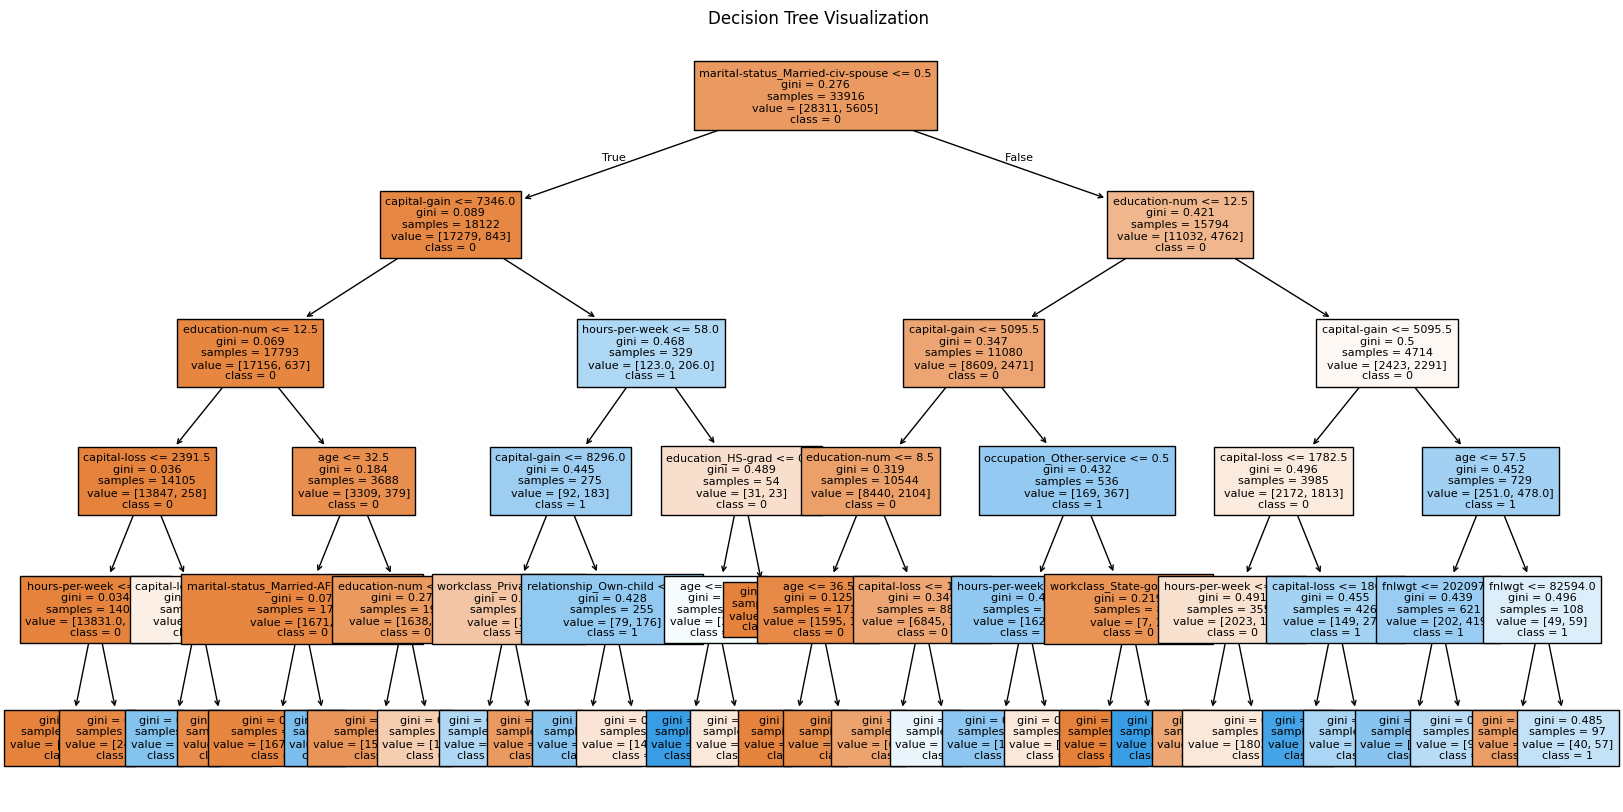

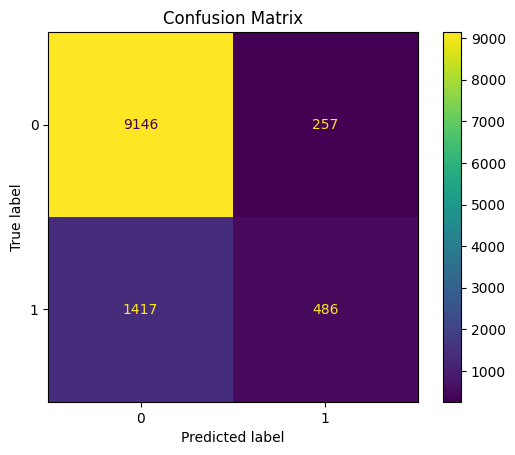


Using y_clean_string:
Precision: 0.6541
Recall: 0.2554
Accuracy: 0.8519


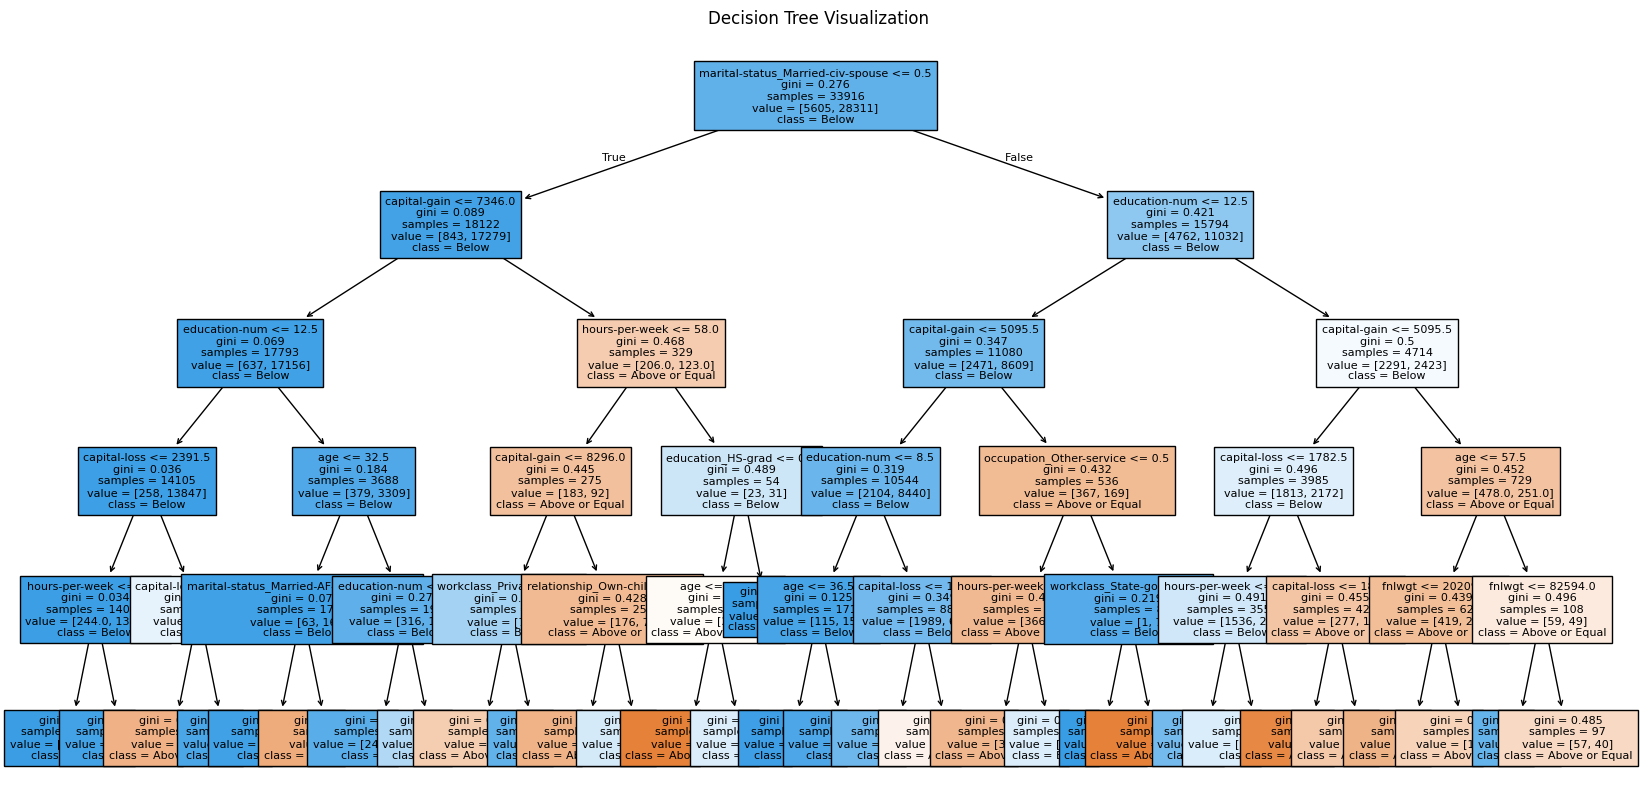

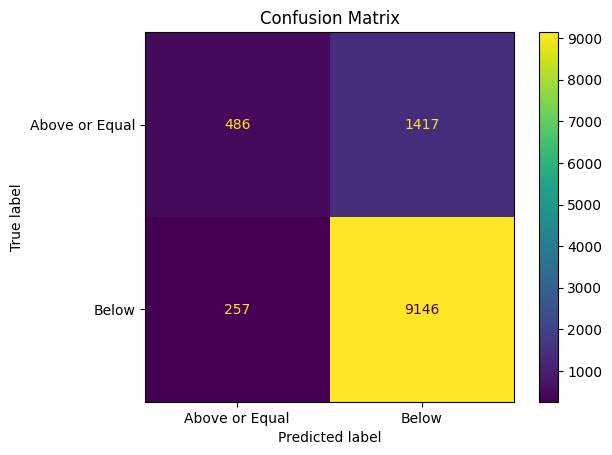

Precision: 0.6541
Recall: 0.2554
Accuracy: 0.8519


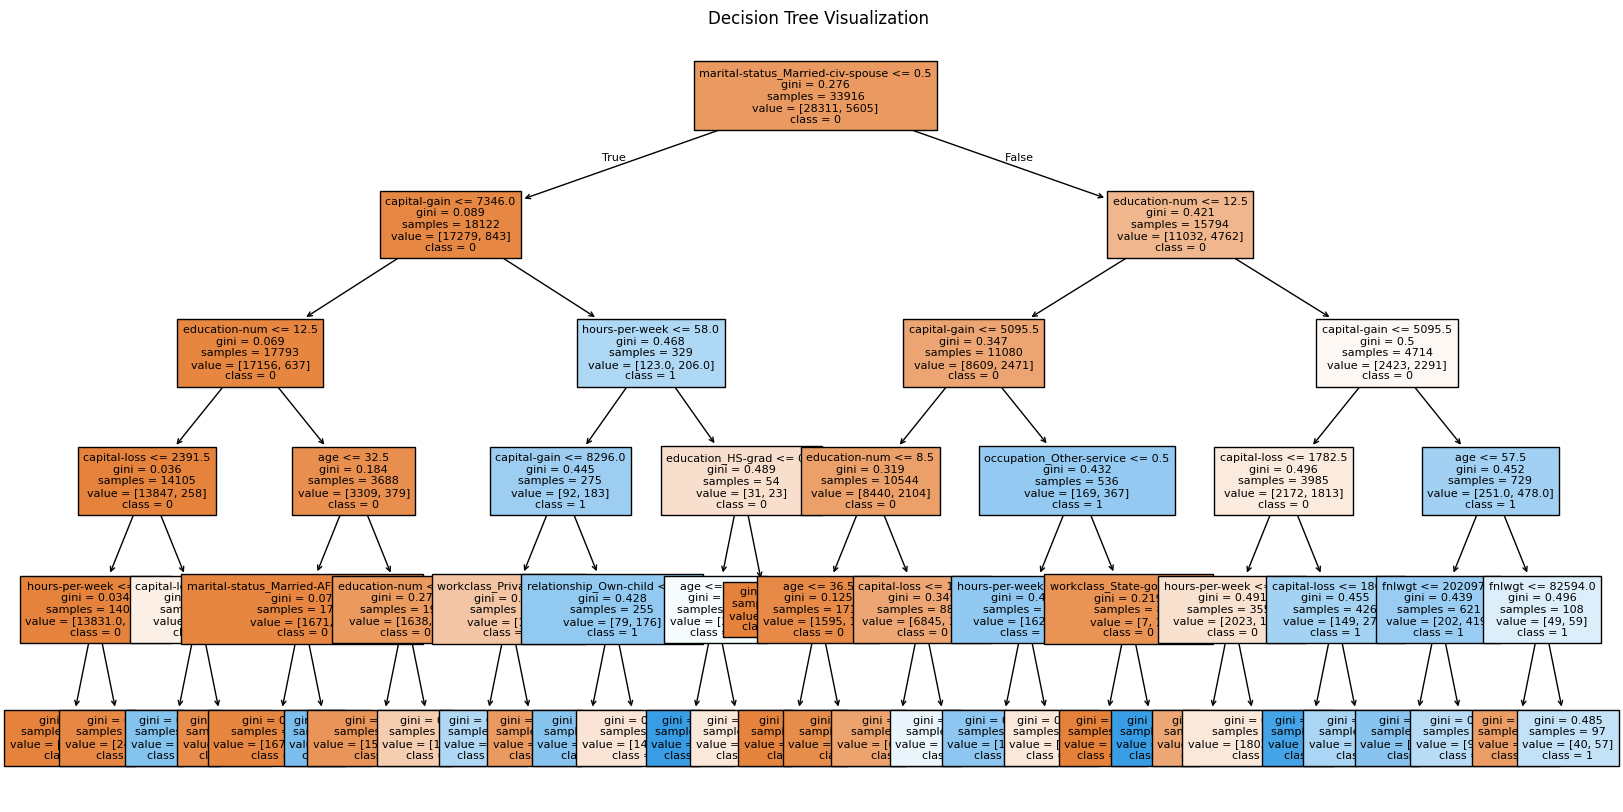

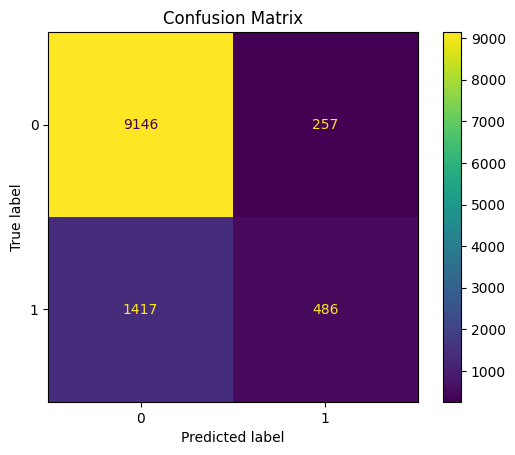

In [110]:
def eval_dtree(X, y, max_depth=None):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=3001)

    dt = DecisionTreeClassifier(random_state=3001, max_depth=max_depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)

    if y.dtype.kind in ['O', 'U', 'S']:
        pos_label = "Above or Equal"
    else:
        pos_label = 1

    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(20,10))
    plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_],
              filled=True, fontsize=8, max_depth=5) 
    plt.title("Decision Tree Visualization")
    plt.show()

    cm_display = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, display_labels=[str(c) for c in dt.classes_])
    cm_display.ax_.set_title("Confusion Matrix")
    plt.show()

    return dt

print("Using y_clean_binary:")
eval_dtree(X_clean, y_clean_binary, max_depth=5)

print("\nUsing y_clean_string:")
eval_dtree(X_clean, y_clean_string, max_depth=5)

dt = eval_dtree(X_clean, y_clean_binary, max_depth=5)


## **Question 2 (5 points):**
## Adjust your function to include some plotting features. After your prediction code, plot:

1.   A visualization of the resulting Decision Tree
2.   A confusion matrix of the results

## Your tree might be overwhelming or very large! If it is too large to be interpreted, constrain the max_depth parameter manually to 5 or less.

Graphs of the resulting decision trees and confusion matrices are displayed above.

## **Question 3 (5 points):**
## Create a sorted list of feature importances and comment on the top features. Plot your feature importances in a horizontal or vertical bar chart from most to least important. Label each bar with its feature importance rounded to the nearest integer (ie: 30%).

## Are there a few that seem to be more important than the others?

Sorted Feature Importance
                              Feature  Importance  Importance (%)
28  marital-status_Married-civ-spouse    0.450597            45.0
2                       education-num    0.242256            24.0
3                        capital-gain    0.213196            21.0
4                        capital-loss    0.051415             5.0
5                      hours-per-week    0.016153             2.0
0                                 age    0.015335             2.0
1                              fnlwgt    0.002703             0.0
39           occupation_Other-service    0.002089             0.0
27   marital-status_Married-AF-spouse    0.001677             0.0
22                  education_HS-grad    0.001609             0.0
48             relationship_Own-child    0.001425             0.0
7                   workclass_Private    0.000828             0.0
10                workclass_State-gov    0.000719             0.0
75             native-country_Ireland    0.000000 

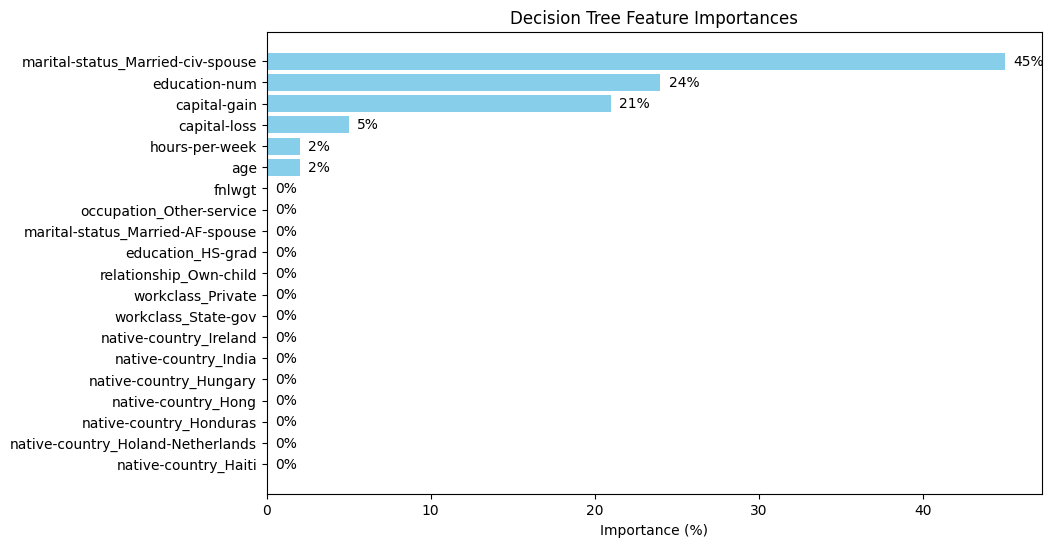

In [111]:
feature_importances = dt.feature_importances_
features = X_clean.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


importance_df = importance_df.head(20)
importance_df['Importance (%)'] = (importance_df['Importance'] * 100).round(0)

print("Sorted Feature Importance")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance (%)')
plt.title('Decision Tree Feature Importances')

for i, v in enumerate(importance_df['Importance (%)']):
    plt.text(v + 0.5, i, f"{int(v)}%", va='center')

plt.show()


**Yes, the ones that seem to be more important than the others consist of a few such as the martial-status_Married-civ-spouse, education-num, capital-gain as they all have above 20%. The rest of the data are either less than 5% or just 0%.**

## **Question 4 (5 points):**
## Write at least 5 sentences interpreting the results of your decision tree, confusion matrix, and feature importance visualizations.

## Is there any aspect of your results that you are uncertain or unsure of?

**My results show...** that the decision tree achieved a pretty good level of accuracy in predicting the individual's income of if it is above or below $50,000. From the confusion matrix, the model does seem to perform well overall but sometimes misclassify some individuals with lower incomes as higher, possibly showing an imbalance or overlap in features between two classes. The top features that were possibly identified was education level, capital gain, and hours worked per week, which makes realistic sense. In general, individuals with higher education, more capital gains, and longer working hours lead to more money being made to higher income.

For an aspect of my result that I am uncertain or unsure of is the fact that the results are from the one-hot encoded categorical variables. This is because doing so may lead to some being more dominant in importance just because they had more representation or unique splits. There is also a vulnerability of decision trees being overfitted when it is not pruned or max_depth is set high. This makes it so that the deeper the trees are, the more unreliable it can become. The values from the precision and recall may hint at something like a Random Forest being better in generalizing.

## **Question 5 (5 points):**
## Finally, we will create a new function to tune your decision tree to get more accurate and efficient results. Update your function to take in several new parameters with these default values:
* criterion_val ='gini'
* splitter_val ='best'
* max_depth_val = None
* min_samples_split_val = 2
* min_samples_leaf_val =1

## Pass your own variable into the decision tree by specifying what sklearn parameter you are trying to tune. This will simply be the parameter without the "_val" suffix.

## **For example, if your vanilla decision tree variable is called clf, you would adjust it like this:**
`clf = DecisionTreeClassifier(criterion=criterion_val, splitter=splitter_val, ...)`

In [112]:
def eval_dtree_tuned(X, y,
    criterion_val='gini',
    splitter_val='best',
    max_depth_val=None,
    min_samples_split_val=2,
    min_samples_leaf_val=1
):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=3001
    )

    clf = DecisionTreeClassifier(
        criterion=criterion_val,
        splitter=splitter_val,
        max_depth=max_depth_val,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=3001
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    if y.dtype == 'object':
        pos_label = "Above or Equal"
    else:
        pos_label = 1

    precision = precision_score(y_test, y_pred, pos_label=pos_label, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=pos_label, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(18, 8))
    plot_tree(clf, filled=True, max_depth=3, fontsize=6)
    plt.title("Decision Tree Visualization (max_depth=3 for readability)")
    plt.show()

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    return clf

## **Question 6 (5 points):**

## Call your new function with either clean y variable at least 3 times. Each time, vary the values for all the parameters and examine its effects on your tree, confusion matrix, and metrics.

You will likely want to look at documentation to see accepted values: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Why did you pick the values you did? What combination had the best effect on accuracy? Were you surprised by any of the results?

Model 1: Default
Precision: 0.4113
Recall: 0.4030
Accuracy: 0.8024


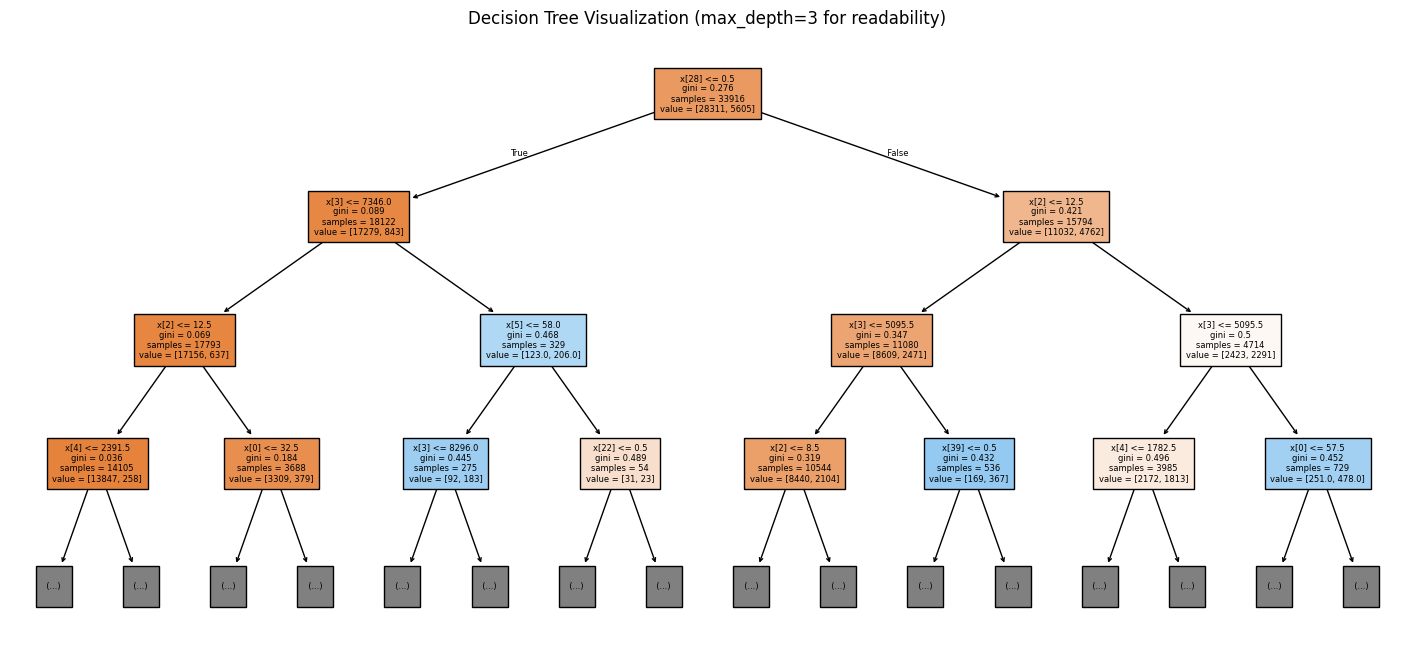

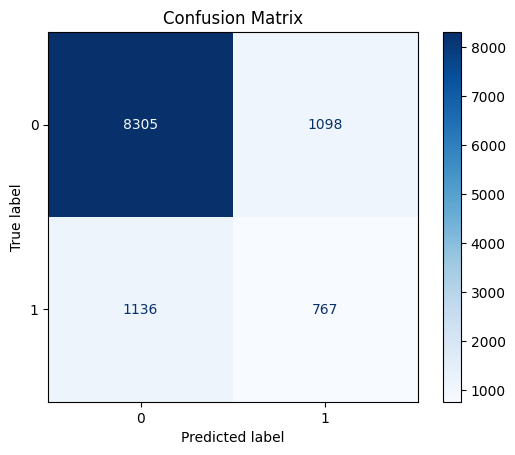

Model 2: changed to entropy, moderate pruning
Precision: 0.6853
Recall: 0.2254
Accuracy: 0.8522


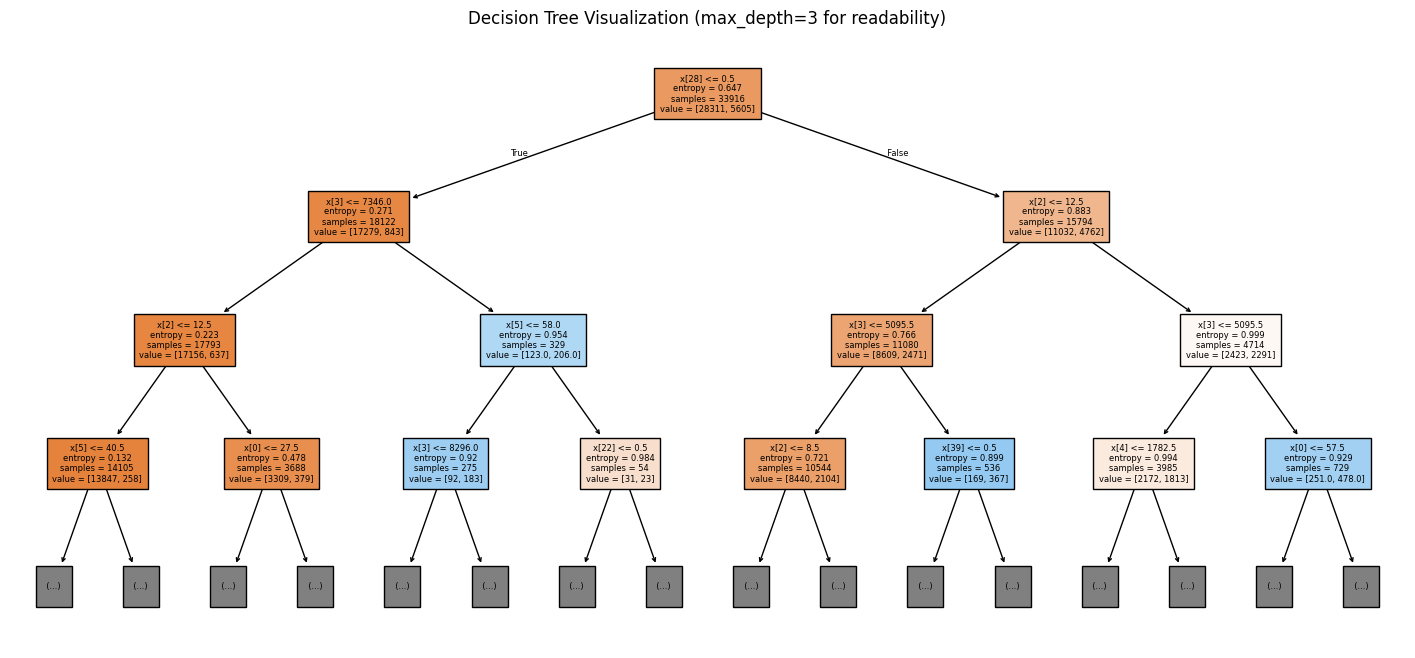

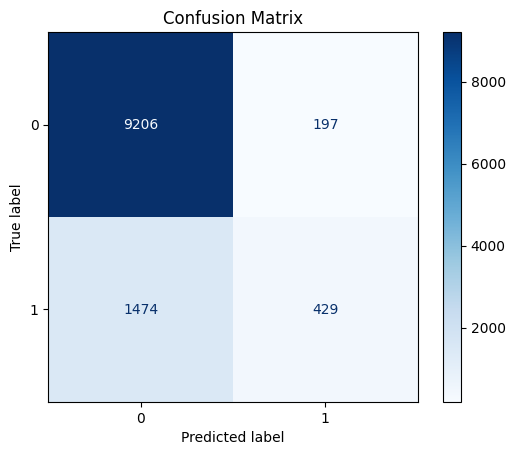


Model 3: random split, more and more and more pruning
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.8317


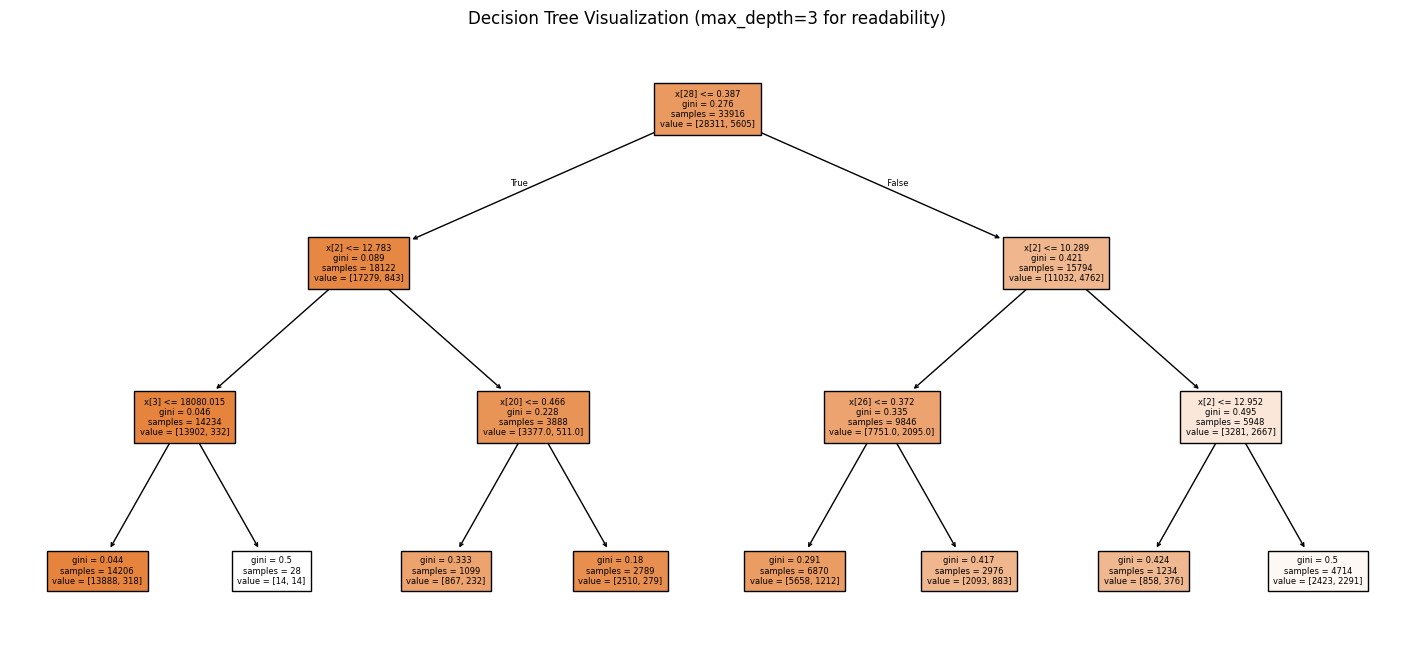

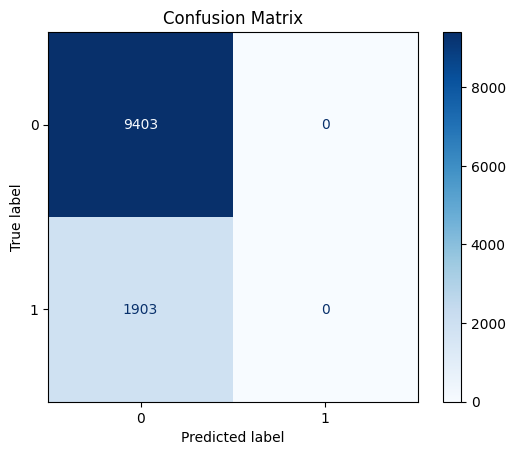

In [113]:
print("Model 1: Default")
dt1 = eval_dtree_tuned(
    X_clean, y_clean_binary,
    criterion_val='gini',
    splitter_val='best',
    max_depth_val=None,
    min_samples_split_val=2,
    min_samples_leaf_val=1
)

print("Model 2: changed to entropy, moderate pruning")
dt2 = eval_dtree_tuned(
    X_clean, y_clean_binary,
    criterion_val='entropy',
    splitter_val='best',
    max_depth_val=5,
    min_samples_split_val=10,
    min_samples_leaf_val=4
)

print("\nModel 3: random split, more and more and more pruning")
dt3 = eval_dtree_tuned(
    X_clean, y_clean_binary,
    criterion_val='gini',
    splitter_val='random',
    max_depth_val=3,
    min_samples_split_val=20,
    min_samples_leaf_val=8
)

**My strategy was to first pick...** a general model using the default parameters to get a normal baseline. The accuracy was not bad with around 80%, but both precision and recall were low, which may show that the tree was overfitting or how it was not effective in separating the high income class.

**My strategy for my second pick...** I changed the criterion to entropy and added a good amount of pruning such as max_depth = 5, higher min_samples_split and min_samples_leaf. This led to the accuracy improving to 85%. Precision also had an increase with 0.68, meaning the model became more confident for people who earn above $50K. However, this also had recall to drop, which meant that there were missed many true positives. 

**My strategy for my third pick** I had used the random splitting as well as added a heavy amount of pruning. The model had completely failed to predict any high-income samples, with precision and recall being 0. However, accuary did stay high because the model was prediciting everyone to be below $50K. This is an example of how too much pruning may lead to the model breaking and causing it to become too simple even if accuracy may look good.

I would say that the best combination was the second model that I had designed. I was quite surprised on how pruning too much could cause inflation of accuracy but have the model completely useless for detecting the positive class.

# **Part 3: Random Forest and Ensembling Evaluation (40 Points)**

## For Parts 3 and 4, you may pick *your own dataset* or continue with the census data.

## Like above, you will want to reference the documentation as necessary:
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


## **Data**
## Use this space to load and call your data for Parts 3 and 4. You are welcome to use your final project data for these sections.

In [174]:
bd = pd.read_csv("breach_report.csv")

bd['Large_Breach'] = bd['Individuals Affected'] >= 1000
y = bd['Large_Breach'].astype(int)  

bd['Type_Location'] = bd['Type of Breach'] + "_" + bd['Location of Breached Information']
X = bd[['Type_Location', 'Covered Entity Type']]

X = pd.get_dummies(X, drop_first=True)

print(bd.shape)
bd.head()

(6449, 11)


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Large_Breach,Type_Location
0,University of Michigan/Michigan Medicine,MI,Healthcare Provider,1015.0,08/13/2025,Unauthorized Access/Disclosure,Paper/Films,No,"The covered entity (CE), University of Michiga...",True,Unauthorized Access/Disclosure_Paper/Films
1,Valley Mountain Regional Center,CA,Business Associate,529.0,07/25/2025,Unauthorized Access/Disclosure,Network Server,No,"Valley Mountain Regional Center, the business ...",False,Unauthorized Access/Disclosure_Network Server
2,Regional Center of the East Bay,CA,Healthcare Provider,689.0,07/09/2025,Unauthorized Access/Disclosure,Laptop,No,"The covered entity (CE), Regional Center of th...",False,Unauthorized Access/Disclosure_Laptop
3,Kotel ATX PLLC dba Heading Health,TX,Healthcare Provider,650.0,07/01/2025,Unauthorized Access/Disclosure,Email,No,NaN,False,Unauthorized Access/Disclosure_Email
4,Cerner Corporation,MO,Business Associate,501.0,06/17/2025,Hacking/IT Incident,Network Server,Yes,Cerner reported that it experienced a cyberatt...,False,Hacking/IT Incident_Network Server


## **Question 1 (10 points):**

## Write a function to take in a feature variable (X) and a target variable (y). In the function, do the following:

* Create a train test split for the variables.
* Instantiate, fit, and predict using a vanilla Decision Tree
* Instantiate, fit, and predict using a vanilla Random Forest classifier.
* Return and print the accuracy, precision, and recall for both models in any format you wish.

## Call your function and describe your baseline results.


In [175]:
def compa_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    dt_preds = dt.predict(X_test)

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)

    results = {
        "Decision Tree": {
            "Accuracy": accuracy_score(y_test, dt_preds),
            "Precision": precision_score(y_test, dt_preds, average="weighted", zero_division=0),
            "Recall": recall_score(y_test, dt_preds, average="weighted", zero_division=0),
        },
        "Random Forest": {
            "Accuracy": accuracy_score(y_test, rf_preds),
            "Precision": precision_score(y_test, rf_preds, average="weighted", zero_division=0),
            "Recall": recall_score(y_test, rf_preds, average="weighted", zero_division=0),
        },
    }

    for model, metrics in results.items():
        print(f"\n{model} Results:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

    return results

results = compa_models(X,y)


(4514, 232) (1935, 232) (4514,) (1935,)

Decision Tree Results:
Accuracy: 0.7959
Precision: 0.7072
Recall: 0.7959

Random Forest Results:
Accuracy: 0.7979
Precision: 0.6914
Recall: 0.7979



## **Question 2 (30 points):**
## This question will ask you to tune Random Forest classifiers and preprocess your data in *any number of ways* to achieve the *best possible results you can*.

## Train one vanilla Decision Forest model and one vanilla Random Forest model and store their accuracies in variables so you can use them as baselines.

## Then, using functions or not, spend some time tuning at least 10 (or more) Random Forest models. Store your accuracies in a list or array and print your maximum accuracy.

# **Go crazy - feel free to implement sampling, dropping features, preprocessing, new parameters, whatever might boost your accuracy.**

# **The top 5 best accuracies in the class will get +15 on their individual lab grade!**

In [ ]:
from itertools import product

# Baseline models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Baseline Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Baseline Random Forest Accuracy: {rf_acc:.4f}")



# 10 or more Random Forest models with different hyperparameter combinations

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

n_estimators = [100, 200, 300]
max_depth = [None, 5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['sqrt', 'log2', None]

combinations = list(product(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features))

results = []

for n, d, ms, ml, mf in combinations:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=d,
        min_samples_split=ms,
        min_samples_leaf=ml,
        max_features=mf,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'accuracy': acc
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='accuracy', ascending=False)
print("\nMaximum Random Forest Accuracy achieved:", results_df['accuracy'].max())


Baseline Decision Tree Accuracy: 0.7959
Baseline Random Forest Accuracy: 0.7979

Maximum Random Forest Accuracy achieved: 0.80671834625323


# **Part 4: Ensemble Model Interpretation and Reflection (15 Points)**


## **Question 1 (5 points):**
## Create a plot that summarizes the results of your experiments and how they compare to the results of your baseline Decision Tree and Random Forest model.

## You may visualize your results in any type of plot you see fit. Color code your visual in some way so that models that did better than the baseline Random Forest are distinguished from models that did worse.

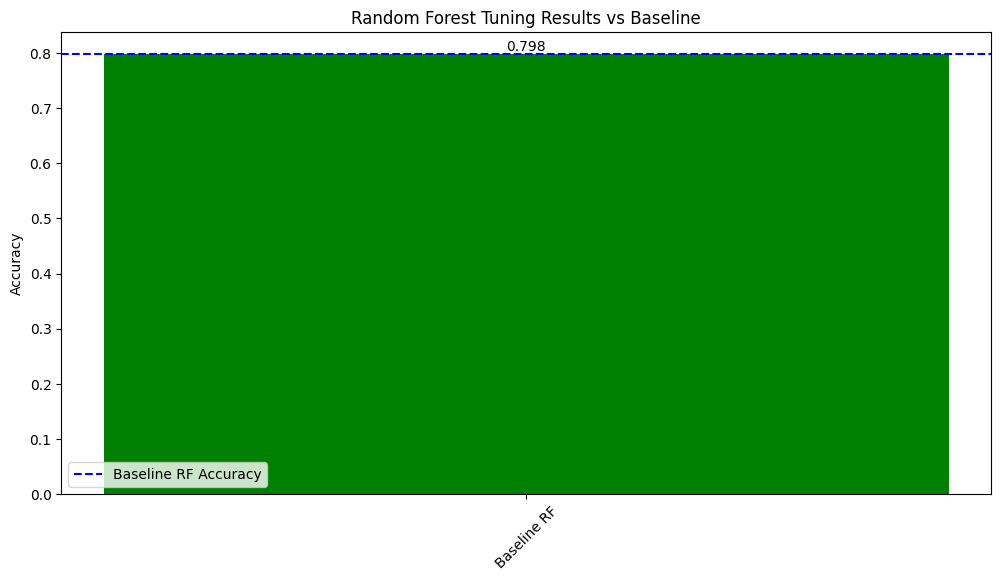

In [179]:
baseline_df = pd.DataFrame({
    'Model': ['Baseline RF'],
    'Accuracy': [rf_acc]
})

plot_df = pd.concat([results_df[['accuracy']].copy(), baseline_df], ignore_index=True)
plot_df['Model'] = plot_df.index.map(lambda i: f'Model {i+1}' if i < len(results_df) else 'Baseline RF')

# Color code: better than baseline = green, worse = red
plot_df['Color'] = plot_df['Accuracy'].apply(lambda x: 'green' if x >= rf_acc else 'orange')


# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(plot_df['Model'], plot_df['Accuracy'], color=plot_df['Color'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.3f}', ha='center', va='bottom')
plt.axhline(rf_acc, color='blue', linestyle='--', label='Baseline RF Accuracy')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Random Forest Tuning Results vs Baseline")
plt.legend()
plt.show()

## **Question 2 (5 points):**
## Write 10 or more sentences on what parameters had the biggest effect or did not seem to effect your results. Did any parameter choices make your results worse than your vanilla model?

**The parameters I chose...** is the number of estimators that had a moderate effect. Increasing the thing from 100 to 300 had slightly improved the stability of the model but did not increase the accuracy that much. Max depth also seemed to be one of the ones that possibly had a large effect. Very shallow trees that were set to 5 underfit, which ended up resulting in a lower accuracy. Trees with the max_depth = None ended up capturing more patterns and gave a much higher accuracy than expected. For the min_samples_split and min_samples_leaf, these were the things that had affected the pruning. Larger values meant that it would reduce overfitting but sometimes leading to underfitting, lowering the accuracy. Max_features also had a big of an importance in the models. By either choosing sqrt or log2, these performed better than None because limiting features reduces the overfitting on categorical dummies. Another test that I had done was adding in class_weight = 'balanced' which absolutely decreased my accuracy by almost 0.3 so 30%. This is likely because of the heavy skew of the dataset. 

## **Question 3 (5 points):**
## Write at least 5 sentences reflecting on the tuning process. A few prompts you might choose to answer are below:

*  What kind of approach did you take?
* Was it random combinations or more structured?
* Did you change your approach after seeing your initial results?
*  What kind of strategies in preprocessing and picking parameters (ie: brute forcing parameters, testing various values in a range) do you think would get some of the best scores in the class?

**My approach to tuning...** was a structured but had some explorations. There were several attempts on looping to try out multiple combinations of parameters such as the n_estimators, max_depth, and min_samples_leaf. In the beginning, I was trying out the extreme values for all the parameters listed in my code. For example, with very extreme values, it would lead to shallow trees, causing the model to underperform and lead to a heavily decreased accuracy. From the initial results, I had decided to focus and reel in the numbers to a moderate amount. For example, moderate depths would be from around 5-15 with reasonable leaf sizes, which seemed to be working pretty well in stabilization. I also found out that balancing classes does not work well with heavily skewed tagets because it hurts the overall accuracy. There was also a lot of brute force testing involved which had significantly helped me figure out and pinpoint which parameters impacted the most, especially in tree depth and max features.

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.